In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation
#misc libraries
import random
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [2]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("Train data with null values: ",train.isnull().sum())

Train data with null values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print('Test data with null values:\n', test.isnull().sum())

Test data with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
test_index = test['PassengerId']

[Text(0, 0, 'Dead'), Text(0, 0, 'Survied')]

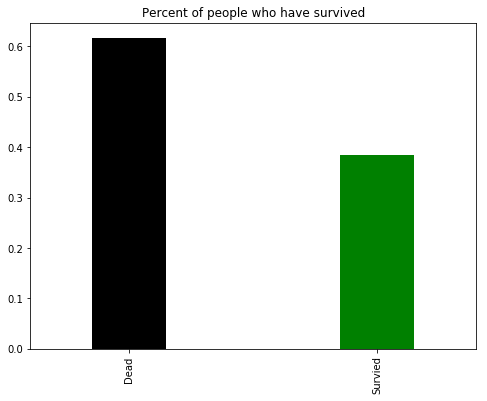

In [8]:
plt.figure(figsize=(8,6))
fig_surv =  train.Survived.value_counts(normalize=True).plot(kind="bar",color=['black','green'],width=0.3)
fig_surv.set_title("Percent of people who have survived")
fig_surv.set_xticklabels(('Dead', 'Survied'))

[]

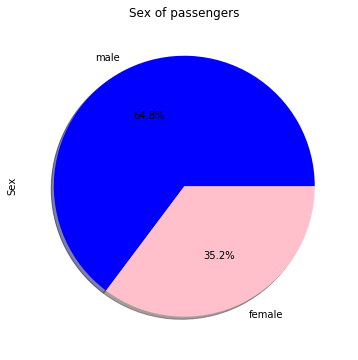

In [9]:
plt.figure(figsize=(8, 6))
fig_sex =  train.Sex.value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%',shadow=True,colors=['blue','pink'])
fig_sex.set_title("Sex of passengers")
fig_sex.set_xticklabels(('Male', 'Female'))

<Figure size 576x432 with 0 Axes>

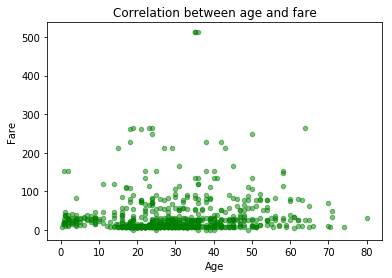

In [10]:
plt.figure(figsize=(8, 6))
fig_age_far = train.plot(kind='scatter',x='Age',y='Fare',alpha=0.5,color='green')
fig_age_far.set_title("Correlation between age and fare")
plt.show()

<Figure size 576x432 with 0 Axes>

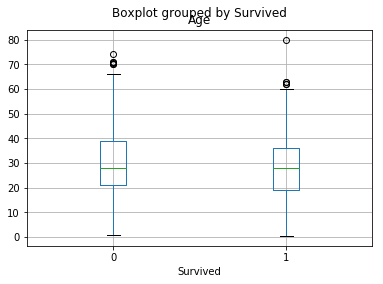

In [11]:
plt.figure(figsize=(8, 6))
fig_box= train.boxplot(column='Age',by='Survived')
plt.show()

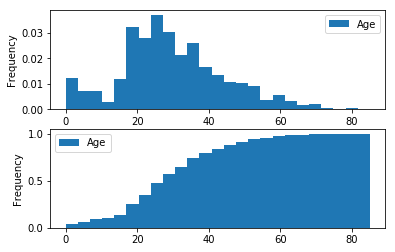

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=1)
train.plot(kind = "hist",y = "Age",bins = 25,range= (0,85),normed = True,ax = axes[0])
train.plot(kind = "hist",y = "Age",bins = 25,range= (0,85),normed = True,ax = axes[1],cumulative = True)
plt.show()

[Text(0, 0, '3rd'), Text(0, 0, '1st'), Text(0, 0, '2st')]

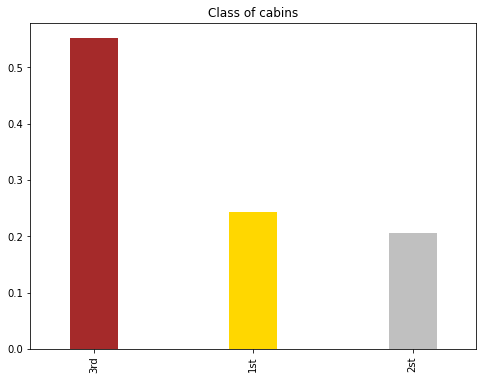

In [13]:
plt.figure(figsize=(8, 6))
fig_class =  train.Pclass.value_counts(normalize=True).plot(kind="bar",color=['brown','gold','silver'],width=0.3)
fig_class.set_title("Class of cabins")
fig_class.set_xticklabels(('3rd', '1st','2st'))

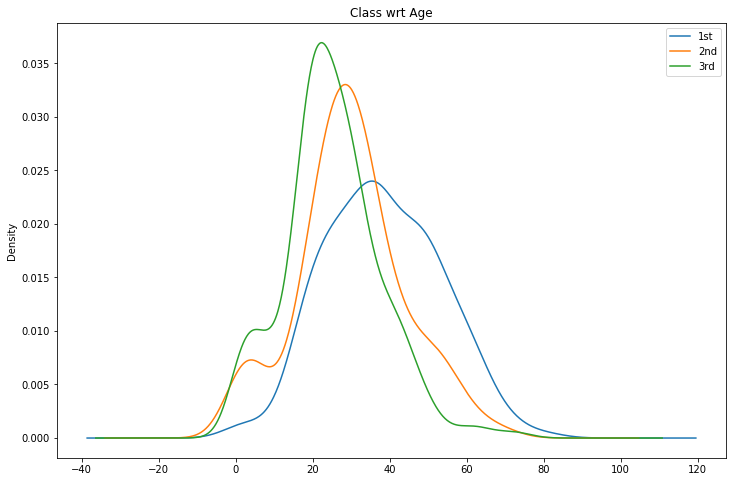

In [14]:
plt.figure(figsize=(12, 8))
for x in [1,2,3]:
    train.Age[train.Pclass==x].plot(kind='kde')
plt.title("Class wrt Age")
plt.legend(['1st','2nd','3rd'])

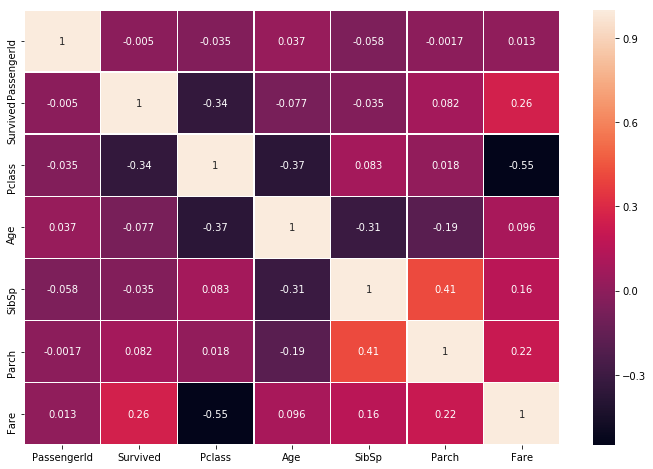

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(),annot=True, linewidths=.5)

In [16]:
full_data = [train,test]
for dataset in full_data:
    dataset['Sex']=dataset['Sex'].map({'male':1,'female':0}).astype(int)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)

In [17]:
med_age = dataset['Age'].median()
std_age = dataset['Age'].std()

for dataset in full_data:
    dataset.loc[dataset['Age'].isnull(), 'Age']=random.randint(int(med_age-std_age), int(med_age+std_age))
    dataset['Age'] = dataset['Age'].astype(int)

In [18]:
drop_columns = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_columns,axis=1,inplace=True)
test.drop(drop_columns,axis=1,inplace=True)

In [19]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].str.split(",",expand=True)[1].str.split('.',expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [20]:
title_names1 = (train['Title'].value_counts() < 10)
title_names2 = (test['Title'].value_counts() < 10)
train['Title']=train['Title'].apply(lambda x: "Misc" if title_names1[x]==True else x)
test['Title']=test['Title'].apply(lambda x: "Misc" if title_names2[x]==True else x)

In [21]:
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBin,AgeBin
509,1,3,"Lang, Mr. Fang",1,26,0,0,56.4958,S,Mr,"(31.0, 512.329]","(16.0, 32.0]"
526,1,2,"Ridsdale, Miss. Lucy",0,50,0,0,10.5000,S,Miss,"(7.91, 14.454]","(48.0, 64.0]"
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,39,0,0,0.0000,S,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
126,0,3,"McMahon, Mr. Martin",1,39,0,0,7.7500,Q,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
651,1,2,"Doling, Miss. Elsie",0,18,0,1,23.0000,S,Miss,"(14.454, 31.0]","(16.0, 32.0]"
510,1,3,"Daly, Mr. Eugene Patrick",1,29,0,0,7.7500,Q,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
740,1,1,"Hawksford, Mr. Walter James",1,39,0,0,30.0000,S,Mr,"(14.454, 31.0]","(32.0, 48.0]"
852,0,3,"Boulos, Miss. Nourelain",0,9,1,1,15.2458,C,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
806,0,1,"Andrews, Mr. Thomas Jr",1,39,0,0,0.0000,S,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
92,0,1,"Chaffee, Mr. Herbert Fuller",1,46,1,0,61.1750,S,Mr,"(31.0, 512.329]","(32.0, 48.0]"


In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
data_x = ['Pclass', 'Embarked', 'Title','FareBin','AgeBin','SibSp','Parch','Sex'] 
train_dummy = pd.get_dummies(train[data_x])
test_dummy = pd.get_dummies(test[data_x])
columns_list = train_dummy.columns

In [23]:
target = train['Survived']
train_dummy  =  pd.concat([train_dummy, target], axis=1, join='inner')

In [24]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(train_dummy[columns_list], target, random_state = 42,test_size=0.3)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train1_x_dummy, train1_y_dummy)
gnb_pred = gnb.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,gnb_pred)

0.7686567164179104

In [26]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=12)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(train1_x_dummy, train1_y_dummy) 
nca_pred = nca_pipe.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,nca_pred)

0.8246268656716418

In [27]:
from sklearn import svm
svm_clf = svm.SVC(gamma='scale',C=1,cache_size=100,kernel='poly',coef0=0.5)
svm_clf.fit(train1_x_dummy, train1_y_dummy)
svm_pred = svm_clf.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,svm_pred)

0.832089552238806

In [28]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=100 ,min_samples_split=4,min_samples_leaf=6)
tree_clf.fit(train1_x_dummy, train1_y_dummy)
tree_pred = tree_clf.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,tree_pred)

0.832089552238806

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=500,max_depth=100,random_state=42,min_samples_split=4,min_samples_leaf=6)
random_clf.fit(train1_x_dummy, train1_y_dummy)
random_pred = random_clf.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,random_pred)

0.8171641791044776

In [30]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD_clf.fit(train1_x_dummy, train1_y_dummy)  
SGD_pred = SGD_clf.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,SGD_pred)


0.7798507462686567

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
GDC_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.75,max_depth=2, random_state=42)
GDC_clf.fit(train1_x_dummy, train1_y_dummy)
GDC_pred = GDC_clf.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,GDC_pred)


0.8208955223880597

In [32]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True,solver='lbfgs', multi_class='auto')
log_clf.fit(train1_x_dummy, train1_y_dummy)
log_pred = log_clf.predict(test1_x_dummy)
accuracy_score(test1_y_dummy,log_pred)

0.8134328358208955

In [33]:
algorithm_dist = {'LogisticRegression':log_clf,'GradientBoosting':GDC_clf,'SGDClassifier':SGD_clf,'RandomTreeClassifier':random_clf,'DecisionTreeClassifier':tree_clf,'SVM':svm_clf,'KNeighborsClassifier':nca_pipe,'GaussianNB':gnb}

In [34]:
from sklearn.model_selection import cross_validate
for key,value in algorithm_dist.items():
    results = cross_validate(value, train1_x_dummy, train1_y_dummy, cv=10, scoring='accuracy',return_train_score=True, return_estimator=False, n_jobs=-1)
    print(key + ' train score:', results['train_score'].mean())
    print(key +' test score:', results['test_score'].mean())

LogisticRegression train score: 0.833959663227789
LogisticRegression test score: 0.8220574116743471
GradientBoosting train score: 0.8876418986849904
GradientBoosting test score: 0.8123535906298004
SGDClassifier train score: 0.785100788973908
SGDClassifier test score: 0.7687820020481311
RandomTreeClassifier train score: 0.845730422678097
RandomTreeClassifier test score: 0.8268457181259601
DecisionTreeClassifier train score: 0.8582151552278091
DecisionTreeClassifier test score: 0.8026265681003585
SVM train score: 0.8476931191243777
SVM test score: 0.8332965309779826
KNeighborsClassifier train score: 0.8455512146312418
KNeighborsClassifier test score: 0.8172427035330261
GaussianNB train score: 0.7665589506252981
GaussianNB test score: 0.7625080005120328


In [35]:
final_pred = svm_clf.predict(test_dummy)
output = pd.DataFrame({'PassengerId': test_index, 'Survived': final_pred.round().astype(int)})
output.to_csv("submission.csv", index = False)